In [4]:
#We import the useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

### Set workspace

Initially, we generate the dataset containing the classes. As evident in the dataframe presented below, each of the 468 observations is associated with a specific class. Currently, we maintain a total of 10 distinct classes.

In [5]:
d_classes = pd.read_csv('files.csv', delimiter=';')

d_classes.sort_values(by=['folder'], inplace=True)
d_classes.reset_index(drop=True, inplace=True)
d_classes.drop(columns = ['Unnamed: 0','folder'], inplace=True)

d_classes

,code,class
0,MR,2
1,MR,2
2,MR,2
3,MR,2
4,MR,2
...,...,...
463,FB,8
464,FF,6
465,FF,6
466,FS,7


As a subsequent step, we proceed to construct a list that encompasses the three signals (x, y, z) obtained from an accelerometer, along with the corresponding time 't', for each trial.

In [6]:
#insert here the path to the directory. The path should contain all the relevant documents for the project in the same folder. 

#path = "C:/Users/markh/Desktop/Università/Paganoni/SL4HD/Train2/"
#path = "C:/Users/giuli/OneDrive/Desktop/SL4HD/Train2/"
path = "C:/Users/hp/OneDrive - Politecnico di Milano/Università/STATISTICAL_LEARNING_FOR_HEALTHCAREDATA/SL4HD/Train2/" 

all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    d_file = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(d_file)

In [7]:
#we divide the observations in train and test sets using the command train_test_split
#we have made the decision to extract the features exclusively based on the information obtained from the training set.

from sklearn.model_selection import train_test_split

li, li_test, d_classes, d_classes_test = train_test_split(li, d_classes, test_size=0.3, random_state=42, stratify=d_classes['class'], shuffle=True)

In [8]:
#We have two columns in the datset: one with the 10 classes and one with 3 classes. The first one will be 
#used at the end of this Notebook to test the final model on the original dataset.

d_classes['class10']=d_classes['class']
d_classes_test['class10']=d_classes_test['class']

The 10  original classes are merged into 3 classes: moving, falls and others. Classes 1,2,3,4,5 are merged into the class 'Moving'; classes 6,7,8 are merged to form the class 'Fall' and the classes 9,10 are used to create the class 'Other'.

In [9]:
d_classes['class']=d_classes['class'].replace([1, 2, 3, 4, 5], 1)
d_classes['class']=d_classes['class'].replace([6, 7, 8], 2)
d_classes['class']=d_classes['class'].replace([9, 10], 3)

d_classes_test['class']=d_classes_test['class'].replace([1, 2, 3, 4, 5], 1)
d_classes_test['class']=d_classes_test['class'].replace([6, 7, 8], 2)
d_classes_test['class']=d_classes_test['class'].replace([9, 10], 3)

In [10]:
d_classes.reset_index(drop=True, inplace=True)
d_classes_test.reset_index(drop=True, inplace=True)

d_classes

,code,class,class10
0,OT,3,10
1,OT,3,10
2,FB,2,8
3,FF,2,6
4,MW,1,1
...,...,...,...
322,OT,3,10
323,FS,2,7
324,MR,1,2
325,WD,1,4


### **Feature Engineering**

The crucial component of our project involved the execution of feature extraction. Initially, a comprehensive set of potentially significant features was extracted from the time series data. Subsequently, a rigorous analysis was conducted to assess the relevance of each feature in associating the signals with specific classes. In this section we firstly present a compilation of all the analyzed features, while at the end you can find a table exclusively comprising the selected features that were retained for further analysis. 

#### Mean

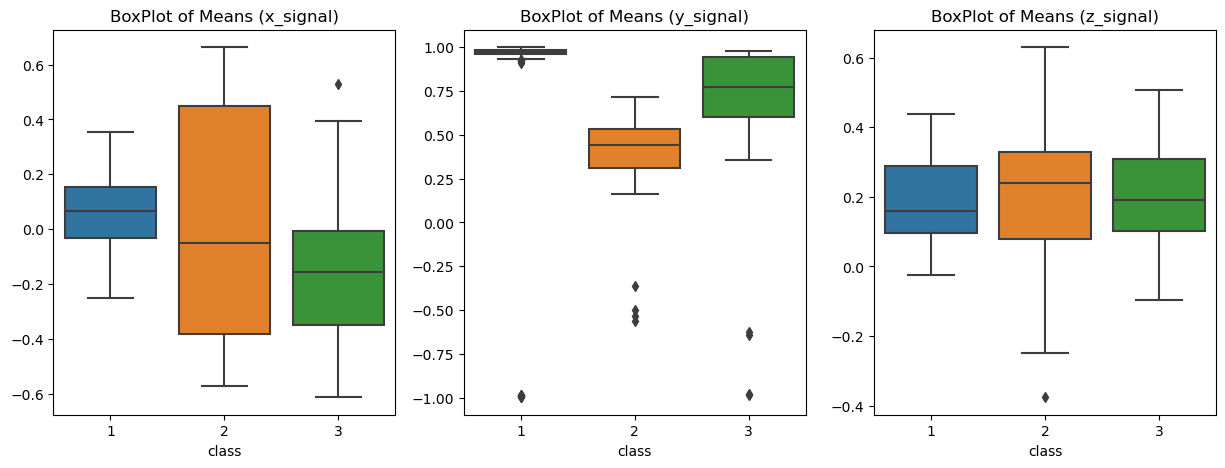

In [11]:
means_x = []
means_y = []
means_z = []
means_x_test = []
means_y_test = []
means_z_test = []

for i in np.arange(len(li)):
    means_x.append(li[i].x.mean())
    means_y.append(li[i].y.mean())
    means_z.append(li[i].z.mean())

for i in np.arange(len(li_test)):
    means_x_test.append(li_test[i].x.mean())
    means_y_test.append(li_test[i].y.mean())
    means_z_test.append(li_test[i].z.mean())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=means_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=means_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=means_z,data=d_classes,ax=axs[2])


axs[0].set_title('BoxPlot of Means (x_signal)')
axs[1].set_title('BoxPlot of Means (y_signal)')
axs[2].set_title('BoxPlot of Means (z_signal)')


plt.show()

#### Variance

Text(0.5, 1.0, 'BoxPlot of Variance (z_signal)')

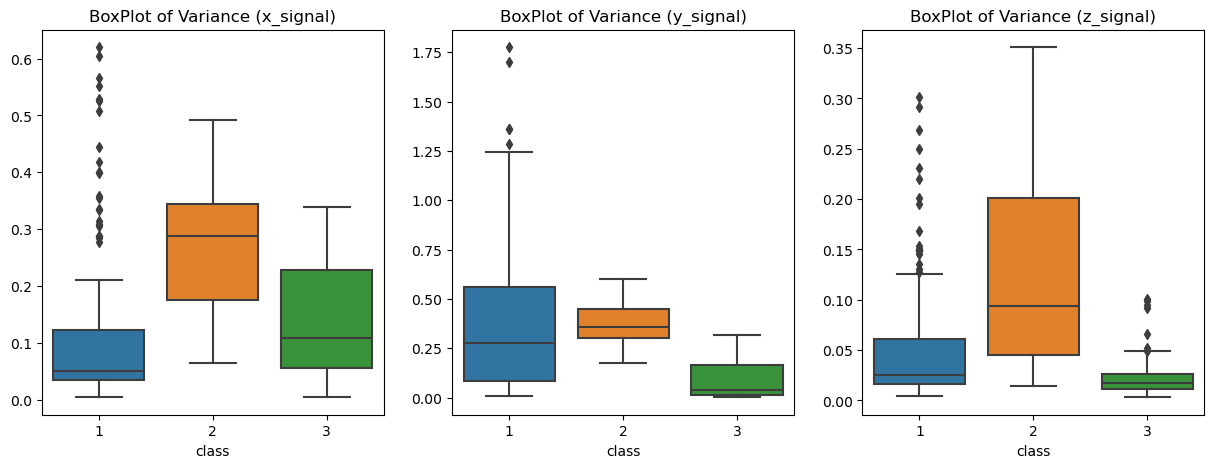

In [12]:
vars_x = []
vars_y = []
vars_z = []
vars_x_test = []
vars_y_test = []
vars_z_test = []

for i in np.arange(len(li)):
    vars_x.append(li[i].x.var())
    vars_y.append(li[i].y.var())
    vars_z.append(li[i].z.var())

for i in np.arange(len(li_test)):
    vars_x_test.append(li_test[i].x.var())
    vars_y_test.append(li_test[i].y.var())
    vars_z_test.append(li_test[i].z.var())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=vars_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=vars_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=vars_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of Variance (x_signal)')
axs[1].set_title('BoxPlot of Variance (y_signal)')
axs[2].set_title('BoxPlot of Variance (z_signal)')

#### Median

Text(0.5, 1.0, 'BoxPlot of Median (z_signal)')

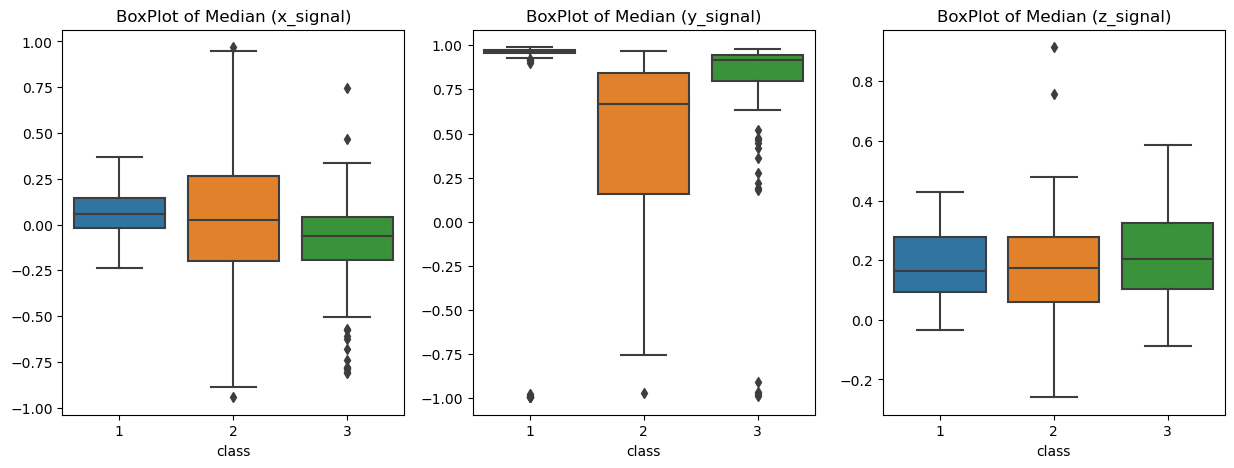

In [13]:
median_x = []
median_y = []
median_z = []
median_x_test = []
median_y_test = []
median_z_test = []

for i in np.arange(len(li)):
    t = np.asarray(li[i].t)

    median_x.append(np.median(li[i].x))
    median_y.append(np.median(li[i].y))
    median_z.append(np.median(li[i].z))

for i in np.arange(len(li_test)):
    median_x_test.append(np.median(li_test[i].x))
    median_y_test.append(np.median(li_test[i].y))
    median_z_test.append(np.median(li_test[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=median_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=median_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=median_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of Median (x_signal)')
axs[1].set_title('BoxPlot of Median (y_signal)')
axs[2].set_title('BoxPlot of Median (z_signal)')

#### Mode

C:\Users\hp\AppData\Local\Temp\ipykernel_16636\1632004786.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_x.append(stats.mode(li[i].x)[0][0])
C:\Users\hp\AppData\Local\Temp\ipykernel_16636\1632004786.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m

Text(0.5, 1.0, 'BoxPlot of Mode (z_signal)')

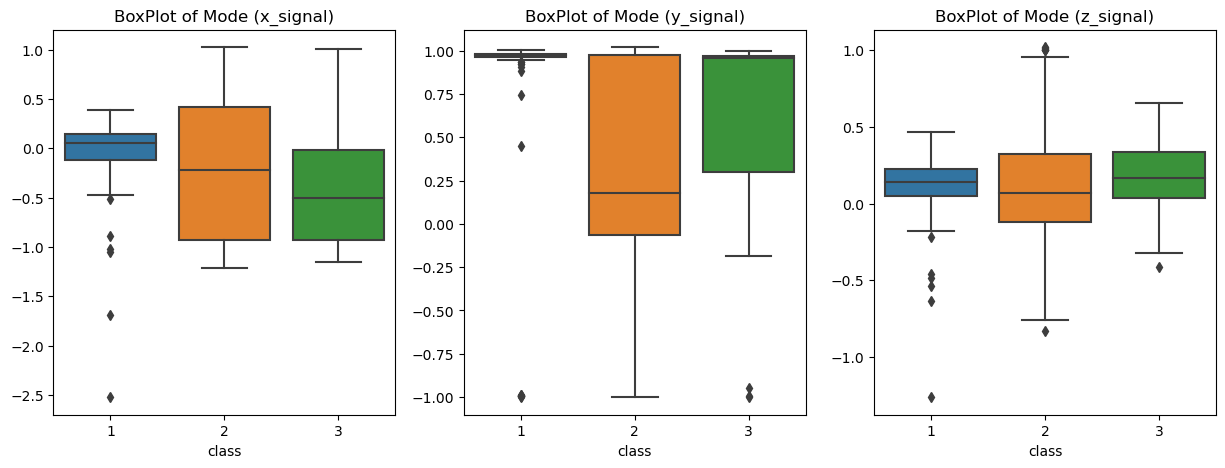

In [14]:
from scipy import stats

mode_x = []
mode_y = []
mode_z = []
mode_x_test = []
mode_y_test = []
mode_z_test = []

for i in np.arange(len(li)):
    mode_x.append(stats.mode(li[i].x)[0][0])
    mode_y.append(stats.mode(li[i].y)[0][0])
    mode_z.append(stats.mode(li[i].z)[0][0])

for i in np.arange(len(li_test)):
    mode_x_test.append(stats.mode(li_test[i].x)[0][0])
    mode_y_test.append(stats.mode(li_test[i].y)[0][0])
    mode_z_test.append(stats.mode(li_test[i].z)[0][0])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=mode_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=mode_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=mode_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of Mode (x_signal)')
axs[1].set_title('BoxPlot of Mode (y_signal)')
axs[2].set_title('BoxPlot of Mode (z_signal)')

#### Root Mean Square (RMS)

Text(0.5, 1.0, 'BoxPlot of RMS (z_signal)')

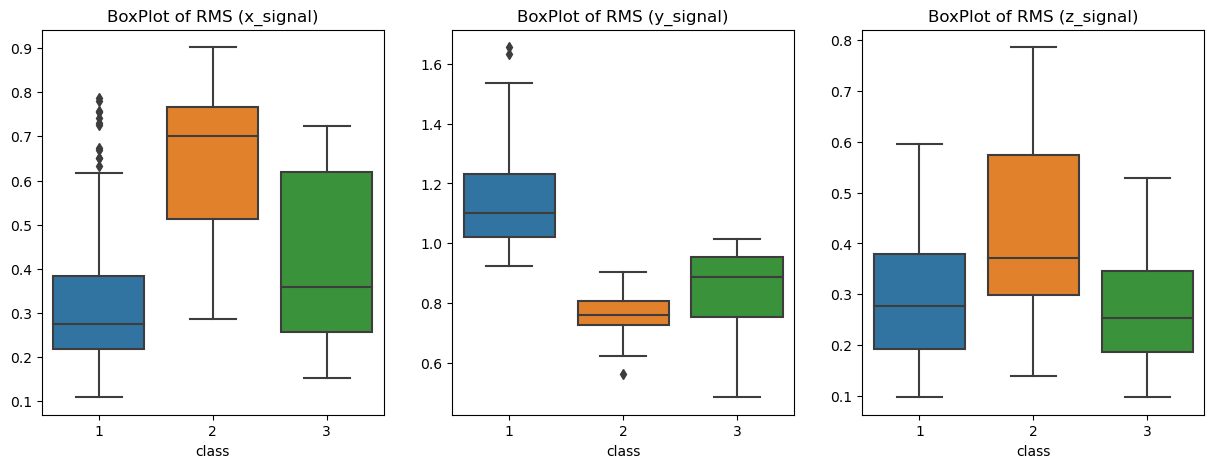

In [15]:
rms_x = []
rms_y = []
rms_z = []
rms_x_test = []
rms_y_test = []
rms_z_test = []

for i in np.arange(len(li)):
    rms_x.append(np.sqrt(np.mean(np.square(li[i].x))))
    rms_y.append(np.sqrt(np.mean(np.square(li[i].y))))
    rms_z.append(np.sqrt(np.mean(np.square(li[i].z))))

for i in np.arange(len(li_test)):
    rms_x_test.append(np.sqrt(np.mean(np.square(li_test[i].x))))
    rms_y_test.append(np.sqrt(np.mean(np.square(li_test[i].y))))
    rms_z_test.append(np.sqrt(np.mean(np.square(li_test[i].z))))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=rms_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=rms_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=rms_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of RMS (x_signal)')
axs[1].set_title('BoxPlot of RMS (y_signal)')
axs[2].set_title('BoxPlot of RMS (z_signal)')

#### Interquartile Range

Text(0.5, 1.0, 'BoxPlot of Interquartile Range (z_signal)')

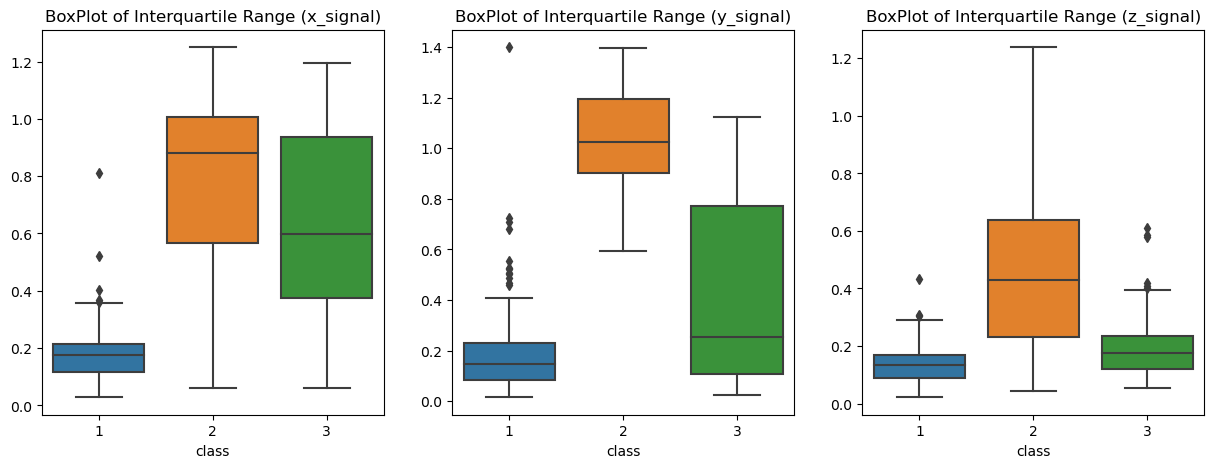

In [16]:
interq_x = []
interq_y = []
interq_z = []
interq_x_test = []
interq_y_test = []
interq_z_test = []

for i in np.arange(len(li)):
    interq_x.append(np.percentile(li[i].x, 75) - np.percentile(li[i].x, 25))
    interq_y.append(np.percentile(li[i].y, 75) - np.percentile(li[i].y, 25))
    interq_z.append(np.percentile(li[i].z, 75) - np.percentile(li[i].z, 25))

for i in np.arange(len(li_test)):
    interq_x_test.append(np.percentile(li_test[i].x, 75) - np.percentile(li_test[i].x, 25))
    interq_y_test.append(np.percentile(li_test[i].y, 75) - np.percentile(li_test[i].y, 25))
    interq_z_test.append(np.percentile(li_test[i].z, 75) - np.percentile(li_test[i].z, 25))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=interq_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=interq_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=interq_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of Interquartile Range (x_signal)')
axs[1].set_title('BoxPlot of Interquartile Range (y_signal)')
axs[2].set_title('BoxPlot of Interquartile Range (z_signal)')

#### Min-Max & Arg-Max - Arg-Min (with polynomials)

Due to the presence of noise in the signals, we have opted to approximate them using third-order polynomials. Subsequently, we extract the Max-Min and ArgMax-ArgMin features from these polynomials.

In [17]:
# Create columns of the output dataset

k = 3
    # Create columns of the output dataset
columns = []
for prefix in ['x', 'y', 'z']:
    for i in range(0, k+1):
        columns.append(f"{prefix}_{i}")
d_poly = pd.DataFrame(columns=columns)
d_poly_test = pd.DataFrame(columns=columns)

# Loop over all the .csv tables
for i in np.arange(len(li)):

    # Get values from every table
    x = np.asarray(li[i].x)
    y = np.asarray(li[i].y)
    z = np.asarray(li[i].z)
    t = np.asarray(li[i].t)

    # Get coefficients of the polynomial fit of order k of x, y, z
    coef_x = np.polyfit(t,x,deg=k,full=False)
    coef_y = np.polyfit(t,y,deg=k,full=False)
    coef_z = np.polyfit(t,z,deg=k,full=False)

    # Add coefficients to the final dataset
    row = []
    for j in np.arange(k+1):
        row.append(coef_x[j])
    for j in np.arange(k+1):
        row.append(coef_y[j])
    for j in np.arange(k+1):
        row.append(coef_z[j])
    d_poly.loc[i] = row

for i in np.arange(len(li_test)):
    # Get values from every table
    x = np.asarray(li_test[i].x)
    y = np.asarray(li_test[i].y)
    z = np.asarray(li_test[i].z)
    t = np.asarray(li_test[i].t)

    # Get coefficients of the polynomial fit of order k of x, y, z
    coef_x = np.polyfit(t,x,deg=k,full=False)
    coef_y = np.polyfit(t,y,deg=k,full=False)
    coef_z = np.polyfit(t,z,deg=k,full=False)

    # Add coefficients to the final dataset
    row = []
    for j in np.arange(k+1):
        row.append(coef_x[j])
    for j in np.arange(k+1):
        row.append(coef_y[j])
    for j in np.arange(k+1):
        row.append(coef_z[j])
    d_poly_test.loc[i] = row


<AxesSubplot:title={'center':'BoxPlot of ArgMax-ArgMin (z_signal)'}, xlabel='class'>

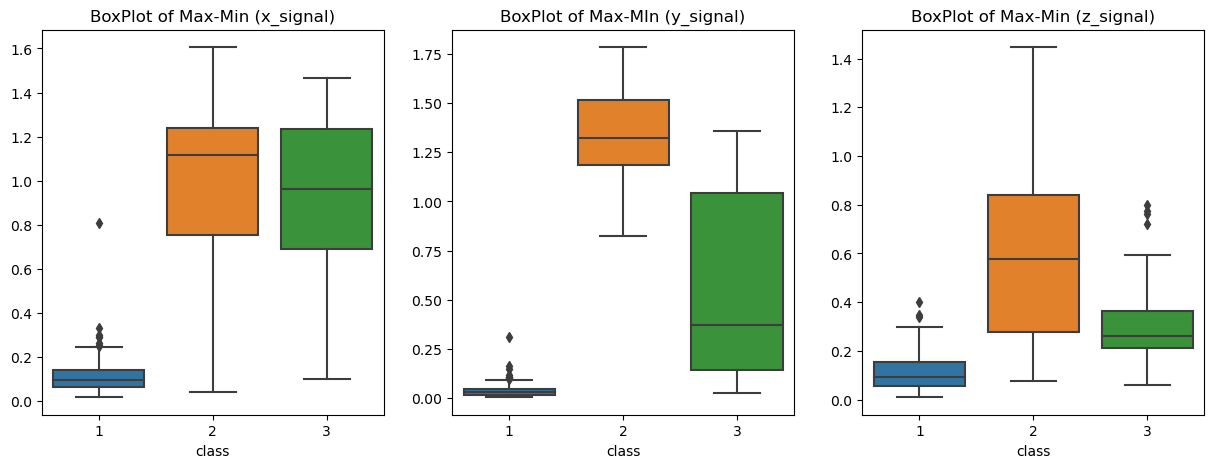

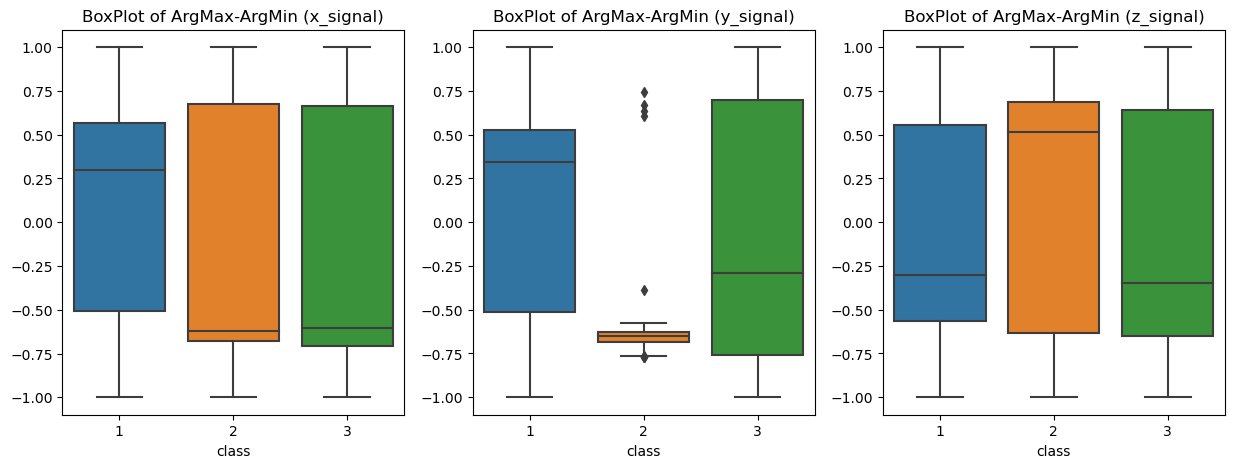

In [18]:
delta_x = []
deltarg_x = []
delta_y = []
deltarg_y = []
delta_z = []
deltarg_z = []
delta_x_test = []
deltarg_x_test = []
delta_y_test = []
deltarg_y_test = []
delta_z_test = []
deltarg_z_test = []

for i in np.arange(len(li)):

    t = np.asarray(li[i].t)
    len_t = len(li[i])

    coef_x = d_poly.iloc[i,:4]
    poly_x = np.poly1d(coef_x)
    delta_x.append(np.max(poly_x(t))-np.min(poly_x(t)))
    deltarg_x.append((np.argmax(poly_x(t))-np.argmin(poly_x(t)))/len_t)
   

    coef_y = d_poly.iloc[i,4:8]
    poly_y = np.poly1d(coef_y)
    delta_y.append(np.max(poly_y(t))-np.min(poly_y(t)))
    deltarg_y.append((np.argmax(poly_y(t))-np.argmin(poly_y(t)))/len_t) 
    

    coef_z = d_poly.iloc[i,8:]
    poly_z = np.poly1d(coef_z)
    delta_z.append(np.max(poly_z(t))-np.min(poly_z(t)))
    deltarg_z.append((np.argmax(poly_z(t))-np.argmin(poly_z(t)))/len_t)

for i in np.arange(len(li_test)):
    t = np.asarray(li_test[i].t)
    len_t = len(li_test[i])

    coef_x = d_poly_test.iloc[i,:4]
    poly_x = np.poly1d(coef_x)
    delta_x_test.append(np.max(poly_x(t))-np.min(poly_x(t)))
    deltarg_x_test.append((np.argmax(poly_x(t))-np.argmin(poly_x(t)))/len_t)
   

    coef_y = d_poly_test.iloc[i,4:8]
    poly_y = np.poly1d(coef_y)
    delta_y_test.append(np.max(poly_y(t))-np.min(poly_y(t)))
    deltarg_y_test.append((np.argmax(poly_y(t))-np.argmin(poly_y(t)))/len_t) 
    

    coef_z = d_poly_test.iloc[i,8:]
    poly_z = np.poly1d(coef_z)
    delta_z_test.append(np.max(poly_z(t))-np.min(poly_z(t)))
    deltarg_z_test.append((np.argmax(poly_z(t))-np.argmin(poly_z(t)))/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=delta_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=delta_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=delta_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of Max-Min (x_signal)')
axs[1].set_title('BoxPlot of Max-MIn (y_signal)')
axs[2].set_title('BoxPlot of Max-Min (z_signal)')

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

axs[0].set_title('BoxPlot of ArgMax-ArgMin (x_signal)')
axs[1].set_title('BoxPlot of ArgMax-ArgMin (y_signal)')
axs[2].set_title('BoxPlot of ArgMax-ArgMin (z_signal)')

sns.boxplot(x='class',y=deltarg_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=deltarg_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=deltarg_z,data=d_classes,ax=axs[2])

#### %Peaks over Threshold

In this step, we calculate the number of points above a specific threshold in relation to the total number of points comprising each signal. Empirically chosen thresholds of 0.5, 1, and 0.5 were used for the signals along the x, y, and z axes, respectively.

Text(0.5, 1.0, 'BoxPlot of %Peaks over Threshold (z_signal)')

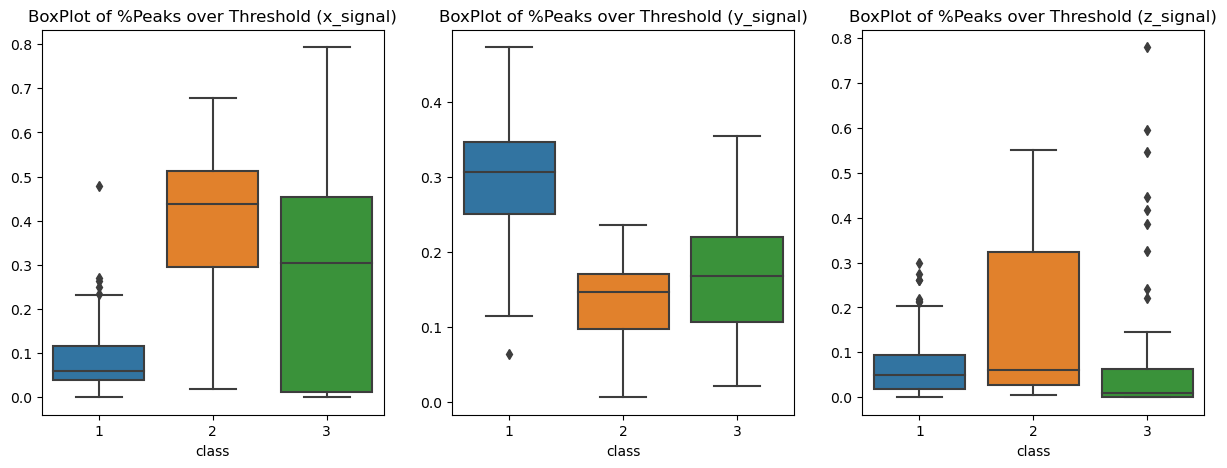

In [19]:
peaks_x = []
peaks_y = []
peaks_z = []
peaks_x_test = []
peaks_y_test = []
peaks_z_test = []
eps_x = 0.5
eps_y = 1
eps_z = 0.5

for i, item in enumerate(li):
    count_x, count_y, count_z = 0, 0, 0
    len_t = len(item.t)
    x_vals = item.x
    y_vals = item.y
    z_vals = item.z
    for j, t_val in enumerate(item.t):
        if abs(x_vals[j]) > eps_x:
            count_x += 1
        if abs(y_vals[j]) > eps_y:
            count_y += 1
        if abs(z_vals[j]) > eps_z:
            count_z += 1
    peaks_x.append(count_x/len_t)
    peaks_y.append(count_y/len_t)
    peaks_z.append(count_z/len_t)

for i, item in enumerate(li_test):
    count_x, count_y, count_z = 0, 0, 0
    len_t = len(item.t)
    x_vals = item.x
    y_vals = item.y
    z_vals = item.z
    for j, t_val in enumerate(item.t):
        if abs(x_vals[j]) > eps_x:
            count_x += 1
        if abs(y_vals[j]) > eps_y:
            count_y += 1
        if abs(z_vals[j]) > eps_z:
            count_z += 1
    peaks_x_test.append(count_x/len_t)
    peaks_y_test.append(count_y/len_t)
    peaks_z_test.append(count_z/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=peaks_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=peaks_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=peaks_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of %Peaks over Threshold (x_signal)')
axs[1].set_title('BoxPlot of %Peaks over Threshold (y_signal)')
axs[2].set_title('BoxPlot of %Peaks over Threshold (z_signal)')

#### %Positive Points

Text(0.5, 1.0, 'BoxPlot of %Positive points (z_signal)')

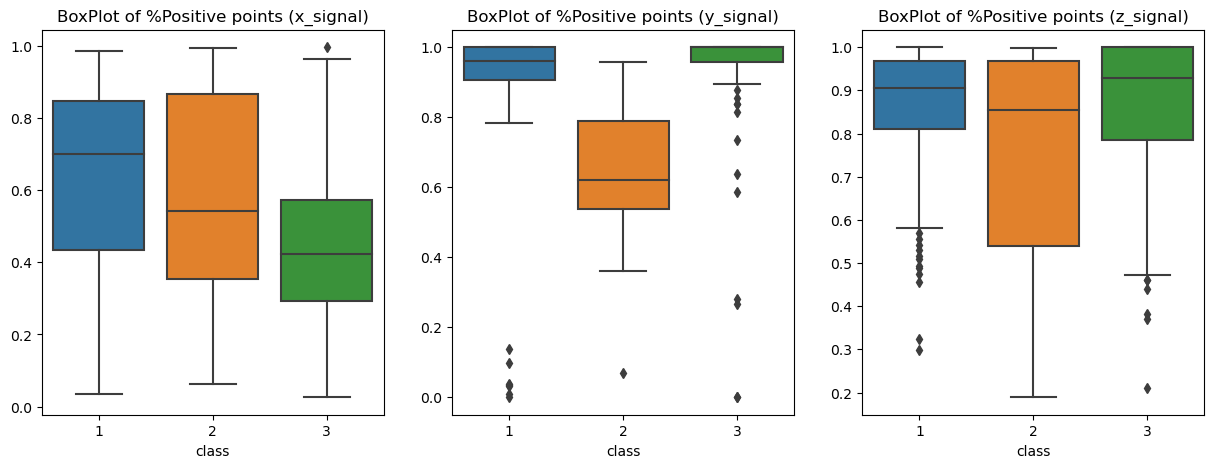

In [20]:
#we calculate the ratio between the number of positive points and the total number of points for each signal.

pn_x = []
pn_y = []
pn_z = []
pn_x_test = []
pn_y_test = []
pn_z_test = []

for i in np.arange(len(li)):
    pos_x = li[i][li[i].x>=0].x.count()
    neg_x = li[i][li[i].x<0].x.count()

    pos_y = li[i][li[i].y>=0].y.count()
    neg_y = li[i][li[i].y<0].y.count()

    pos_z = li[i][li[i].z>=0].z.count()
    neg_z = li[i][li[i].z<0].z.count()

    pn_x.append(pos_x/(pos_x+neg_x))
    pn_y.append(pos_y/(pos_y+neg_y))
    pn_z.append(pos_z/(pos_z+neg_z))

for i in np.arange(len(li_test)):
    pos_x = li_test[i][li_test[i].x>=0].x.count()
    neg_x = li_test[i][li_test[i].x<0].x.count()

    pos_y = li_test[i][li_test[i].y>=0].y.count()
    neg_y = li_test[i][li_test[i].y<0].y.count()

    pos_z = li_test[i][li_test[i].z>=0].z.count()
    neg_z = li_test[i][li_test[i].z<0].z.count()

    pn_x_test.append(pos_x/(pos_x+neg_x))
    pn_y_test.append(pos_y/(pos_y+neg_y))
    pn_z_test.append(pos_z/(pos_z+neg_z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=pn_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=pn_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=pn_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of %Positive points (x_signal)')
axs[1].set_title('BoxPlot of %Positive points (y_signal)')
axs[2].set_title('BoxPlot of %Positive points (z_signal)')

#### %Zero Crossing Points

Text(0.5, 1.0, 'BoxPlot of %Zero Crossing points (z_signal)')

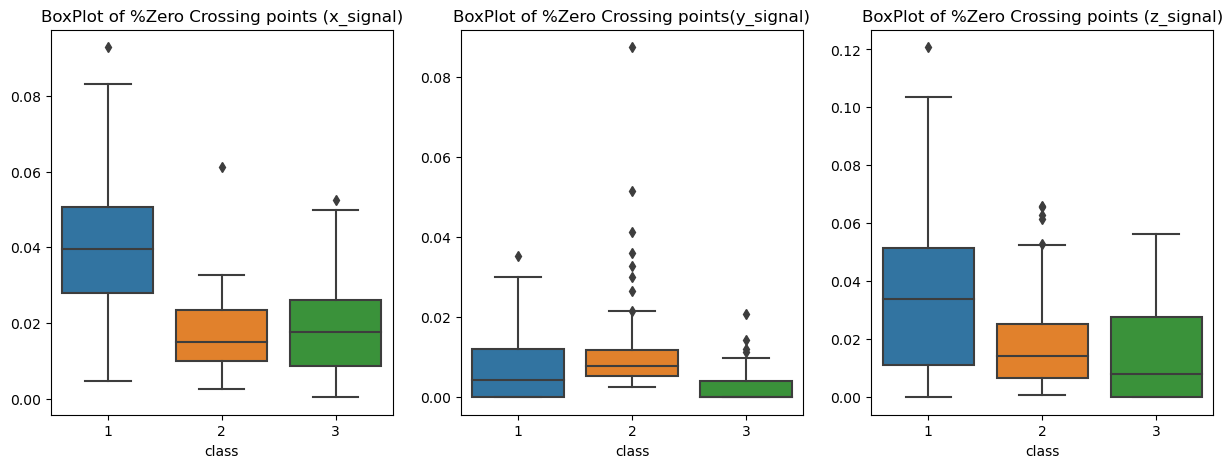

In [21]:
#we calculate the ratio between the number of zero crossing points and the total number of points for each signal.

zero_crossing_x = []
zero_crossing_y = []
zero_crossing_z = []
zero_crossing_x_test = []
zero_crossing_y_test = []
zero_crossing_z_test = []

for i in np.arange(len(li)):
    zero_crossing_x.append(len(np.where(np.diff(np.sign(li[i].x)))[0]) / len(li[i].x))
    zero_crossing_y.append(len(np.where(np.diff(np.sign(li[i].y)))[0]) / len(li[i].y))
    zero_crossing_z.append(len(np.where(np.diff(np.sign(li[i].z)))[0]) / len(li[i].z))

for i in np.arange(len(li_test)):
    zero_crossing_x_test.append(len(np.where(np.diff(np.sign(li_test[i].x)))[0]) / len(li_test[i].x))
    zero_crossing_y_test.append(len(np.where(np.diff(np.sign(li_test[i].y)))[0]) / len(li_test[i].y))
    zero_crossing_z_test.append(len(np.where(np.diff(np.sign(li_test[i].z)))[0]) / len(li_test[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=zero_crossing_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=zero_crossing_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=zero_crossing_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of %Zero Crossing points (x_signal)')
axs[1].set_title('BoxPlot of %Zero Crossing points(y_signal)')
axs[2].set_title('BoxPlot of %Zero Crossing points (z_signal)')

#### Energy

Text(0.5, 1.0, 'BoxPlot of Energy (z_signal)')

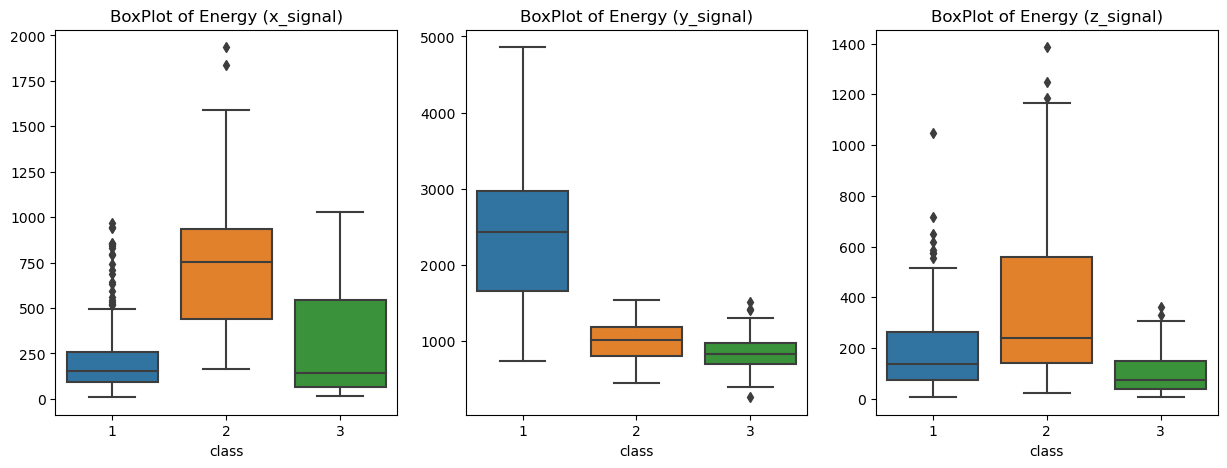

In [22]:
energies_x = []
energies_y = []
energies_z = []
energies_x_test = []
energies_y_test = []
energies_z_test = []

for i in np.arange(len(li)):

    en_x = np.sum(li[i].x**2)
    en_y = np.sum(li[i].y**2)
    en_z = np.sum(li[i].z**2)
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    energies_x.append(en_x)
    energies_y.append(en_y)
    energies_z.append(en_z)

for i in np.arange(len(li_test)):
    en_x = np.sum(li_test[i].x**2)
    en_y = np.sum(li_test[i].y**2)
    en_z = np.sum(li_test[i].z**2)
    en_tot = np.sum(li_test[i].x**2+li_test[i].y**2+li_test[i].z**2)

    energies_x_test.append(en_x)
    energies_y_test.append(en_y)
    energies_z_test.append(en_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=energies_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=energies_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=energies_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of Energy (x_signal)')
axs[1].set_title('BoxPlot of Energy (y_signal)')
axs[2].set_title('BoxPlot of Energy (z_signal)')

#### Power

Text(0.5, 1.0, 'BoxPlot of Power (z_signal)')

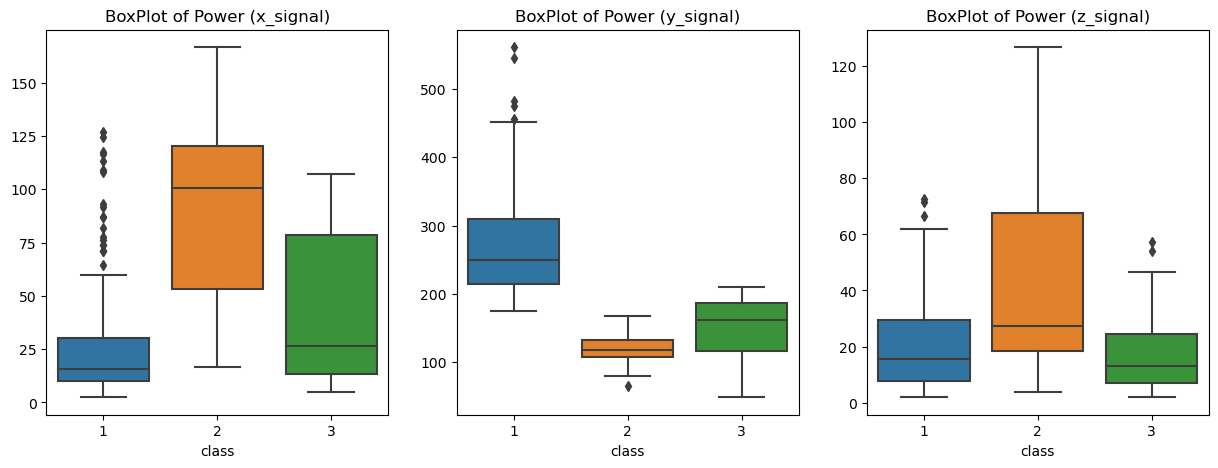

In [23]:
powers_x = []
powers_y = []
powers_z = []
powers_x_test = []
powers_y_test = []
powers_z_test = []

for i in np.arange(len(li)):

    duration = li[i].t[len(li[i])-1]-li[i].t[0]
    pow_x = np.sum(li[i].x**2)/duration
    pow_y = np.sum(li[i].y**2)/duration
    pow_z = np.sum(li[i].z**2)/duration
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    powers_x.append(pow_x)
    powers_y.append(pow_y)
    powers_z.append(pow_z)

for i in np.arange(len(li_test)):
    duration = li_test[i].t[len(li_test[i])-1]-li_test[i].t[0]
    pow_x = np.sum(li_test[i].x**2)/duration
    pow_y = np.sum(li_test[i].y**2)/duration
    pow_z = np.sum(li_test[i].z**2)/duration
    en_tot = np.sum(li_test[i].x**2+li_test[i].y**2+li_test[i].z**2)

    powers_x_test.append(pow_x)
    powers_y_test.append(pow_y)
    powers_z_test.append(pow_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=powers_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=powers_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=powers_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of Power (x_signal)')
axs[1].set_title('BoxPlot of Power (y_signal)')
axs[2].set_title('BoxPlot of Power (z_signal)')

#### Skewness

Text(0.5, 1.0, 'BoxPlot of Skewness (z_signal)')

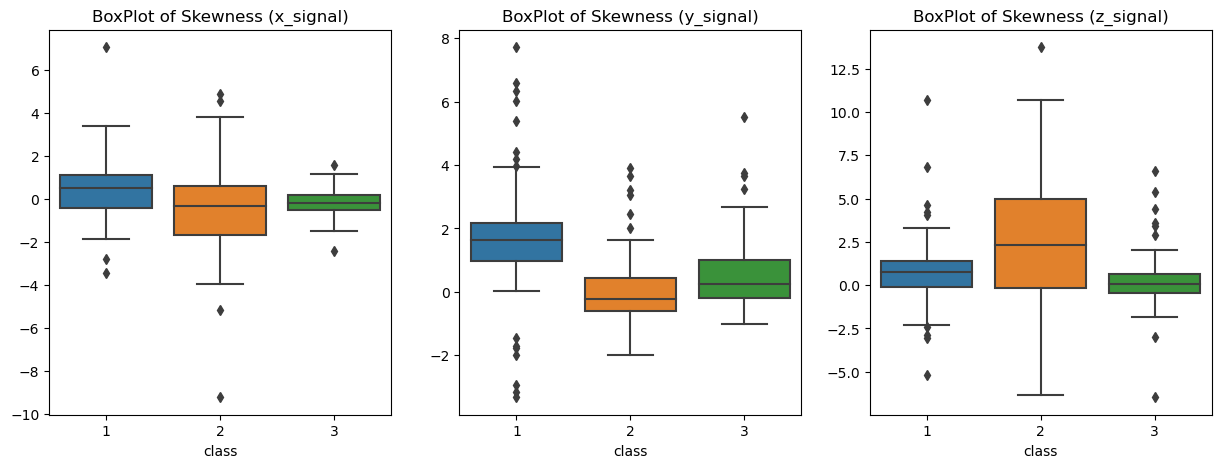

In [24]:
from scipy.stats import skew

skew_x = []
skew_y = []
skew_z = []
skew_x_test = []
skew_y_test = []
skew_z_test = []

for i in np.arange(len(li)):
    skew_x.append(skew(li[i].x))
    skew_y.append(skew(li[i].y))
    skew_z.append(skew(li[i].z))

for i in np.arange(len(li_test)):
    skew_x_test.append(skew(li_test[i].x))
    skew_y_test.append(skew(li_test[i].y))
    skew_z_test.append(skew(li_test[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=skew_x,data=d_classes,ax=axs[0])
sns.boxplot(x='class',y=skew_y,data=d_classes,ax=axs[1])
sns.boxplot(x='class',y=skew_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of Skewness (x_signal)')
axs[1].set_title('BoxPlot of Skewness (y_signal)')
axs[2].set_title('BoxPlot of Skewness (z_signal)')

#### Kurtosis

Text(0.5, 1.0, 'BoxPlot of Kurtosis (z_signal)')

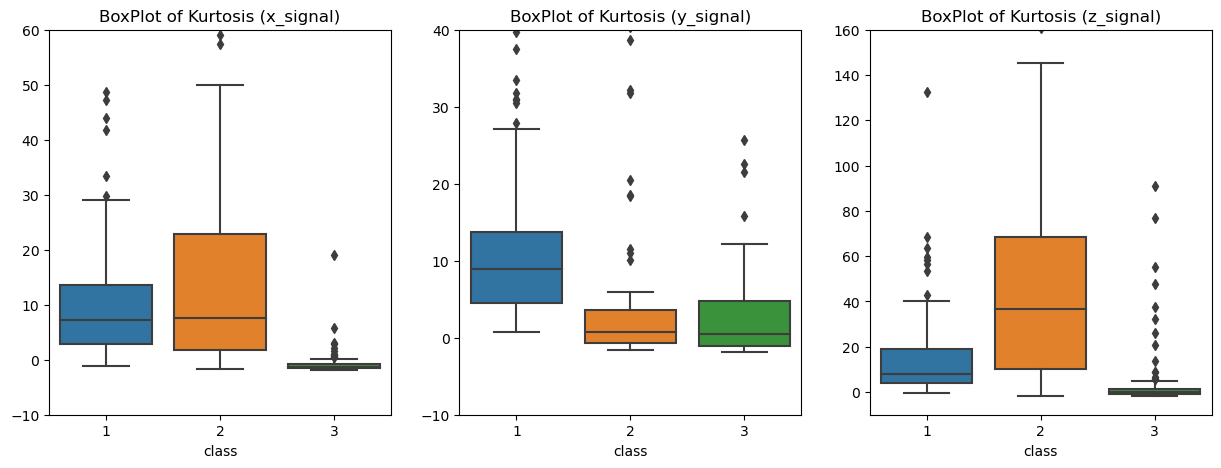

In [25]:
from scipy.stats import kurtosis

kurtosis_x = []
kurtosis_y = []
kurtosis_z = []
kurtosis_x_test = []
kurtosis_y_test = []
kurtosis_z_test = []

for i in np.arange(len(li)):
    kurtosis_x.append(kurtosis(li[i].x))
    kurtosis_y.append(kurtosis(li[i].y))
    kurtosis_z.append(kurtosis(li[i].z))

for i in np.arange(len(li_test)):
    kurtosis_x_test.append(kurtosis(li_test[i].x))
    kurtosis_y_test.append(kurtosis(li_test[i].y))
    kurtosis_z_test.append(kurtosis(li_test[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=kurtosis_x,data=d_classes,ax=axs[0])
axs[0].set_ylim(-10,60)
sns.boxplot(x='class',y=kurtosis_y,data=d_classes,ax=axs[1])
axs[1].set_ylim(-10,40)
sns.boxplot(x='class',y=kurtosis_z,data=d_classes,ax=axs[2])
axs[2].set_ylim(-10,160)

axs[0].set_title('BoxPlot of Kurtosis (x_signal)')
axs[1].set_title('BoxPlot of Kurtosis (y_signal)')
axs[2].set_title('BoxPlot of Kurtosis (z_signal)')

#### Entropy

Text(0.5, 1.0, 'BoxPlot of Entropy (z_signal)')

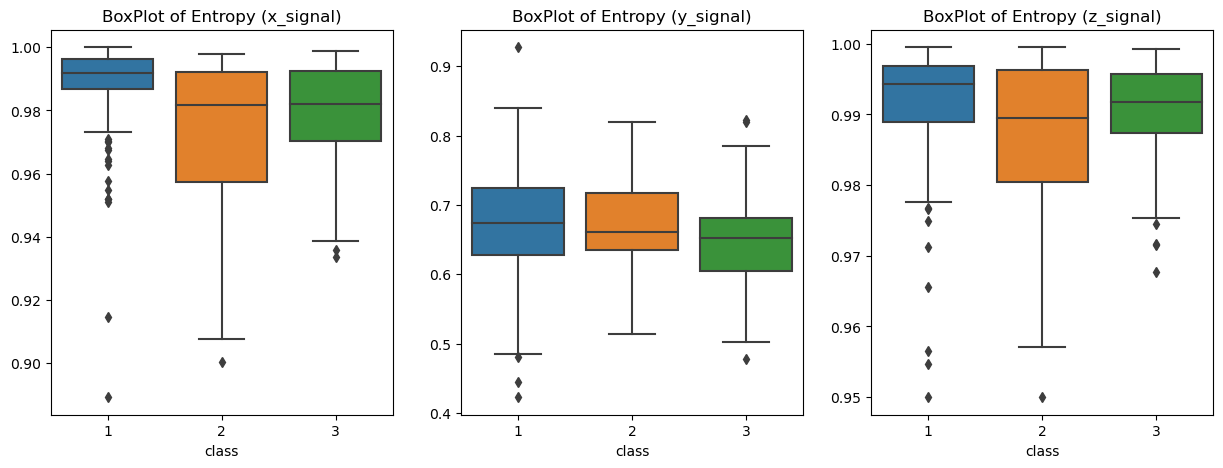

In [26]:
entropy_x = []
entropy_y = []
entropy_z = []
entropy_x_test = []
entropy_y_test = []
entropy_z_test = []

for i in np.arange(len(li)):
    valuex, countsx = np.unique(li[i].x, return_counts=True)
    px = countsx / countsx.sum()
    px = px[np.where(px != 0)]
    if np.log2(len(li[i].x)) == 1:
        entropy_x.append(0)
    elif np.sum(px * np.log2(px)) / np.log2(len(li[i].x)) == 0:
        entropy_x.append(0)
    else:
        entropy_x.append(- np.sum(px * np.log2(px)) / np.log2(len(li[i].x)))
        
    valuey, countsy = np.unique(li[i].y, return_counts=True)
    py = countsy / countsy.sum()
    py = py[np.where(py != 0)]
    if np.log2(len(li[i].y)) == 1:
        entropy_y.append(0)
    elif np.sum(py * np.log2(py)) / np.log2(len(li[i].y)) == 0:
        entropy_y.append(0)
    else:
        entropy_y.append(- np.sum(py * np.log2(py)) / np.log2(len(li[i].y)))
        
    valuez, countsz = np.unique(li[i].z, return_counts=True)
    pz = countsz / countsz.sum()
    pz = pz[np.where(pz != 0)]
    if np.log2(len(li[i].z)) == 1:
        entropy_z.append(0)
    elif np.sum(pz * np.log2(pz)) / np.log2(len(li[i].z)) == 0:
        entropy_z.append(0)
    else:
        entropy_z.append(- np.sum(pz * np.log2(pz)) / np.log2(len(li[i].z)))

for i in np.arange(len(li_test)):
    valuex, countsx = np.unique(li_test[i].x, return_counts=True)
    px = countsx / countsx.sum()
    px = px[np.where(px != 0)]
    if np.log2(len(li_test[i].x)) == 1:
        entropy_x_test.append(0)
    elif np.sum(px * np.log2(px)) / np.log2(len(li_test[i].x)) == 0:
        entropy_x_test.append(0)
    else:
        entropy_x_test.append(- np.sum(px * np.log2(px)) / np.log2(len(li_test[i].x)))
        
    valuey, countsy = np.unique(li_test[i].y, return_counts=True)
    py = countsy / countsy.sum()
    py = py[np.where(py != 0)]
    if np.log2(len(li_test[i].y)) == 1:
        entropy_y_test.append(0)
    elif np.sum(py * np.log2(py)) / np.log2(len(li_test[i].y)) == 0:
        entropy_y_test.append(0)
    else:
        entropy_y_test.append(- np.sum(py * np.log2(py)) / np.log2(len(li_test[i].y)))
        
    valuez, countsz = np.unique(li_test[i].z, return_counts=True)
    pz = countsz / countsz.sum()
    pz = pz[np.where(pz != 0)]
    if np.log2(len(li_test[i].z)) == 1:
        entropy_z_test.append(0)
    elif np.sum(pz * np.log2(pz)) / np.log2(len(li_test[i].z)) == 0:
        entropy_z_test.append(0)
    else:
        entropy_z_test.append(- np.sum(pz * np.log2(pz)) / np.log2(len(li_test[i].z)))
   
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=entropy_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=entropy_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=entropy_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of Entropy (x_signal)')
axs[1].set_title('BoxPlot of Entropy (y_signal)')
axs[2].set_title('BoxPlot of Entropy (z_signal)')

#### Temporal Centroid

Text(0.5, 1.0, 'BoxPlot of Temporal Centroid (z_signal)')

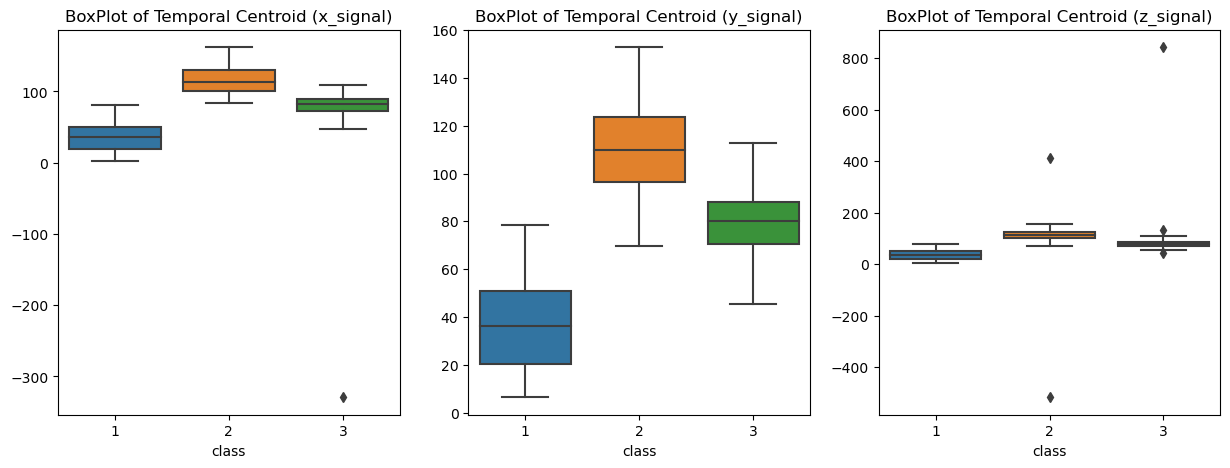

In [27]:
temporal_centroid_x = []
temporal_centroid_y = []
temporal_centroid_z = []
temporal_centroid_x_test = []
temporal_centroid_y_test = []
temporal_centroid_z_test = []

for i in np.arange(len(li)):
    temporal_centroid_x.append(np.sum(li[i].t * li[i].x) / np.sum(li[i].x))
    temporal_centroid_y.append(np.sum(li[i].t * li[i].y) / np.sum(li[i].y))
    temporal_centroid_z.append(np.sum(li[i].t * li[i].z) / np.sum(li[i].z))

for i in np.arange(len(li_test)):
    temporal_centroid_x_test.append(np.sum(li_test[i].t * li_test[i].x) / np.sum(li_test[i].x))
    temporal_centroid_y_test.append(np.sum(li_test[i].t * li_test[i].y) / np.sum(li_test[i].y))
    temporal_centroid_z_test.append(np.sum(li_test[i].t * li_test[i].z) / np.sum(li_test[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=temporal_centroid_x,data=d_classes,ax=axs[0])

sns.boxplot(x='class',y=temporal_centroid_y,data=d_classes,ax=axs[1])

sns.boxplot(x='class',y=temporal_centroid_z,data=d_classes,ax=axs[2])

axs[0].set_title('BoxPlot of Temporal Centroid (x_signal)')
axs[1].set_title('BoxPlot of Temporal Centroid (y_signal)')
axs[2].set_title('BoxPlot of Temporal Centroid (z_signal)')

Here we present the comprehensive list of examined features. For each feature, we indicate whether it was retained or not based on the boxplot analysis, along with the corresponding axis on which it was retained.


| Examined Features|  Retained Feature | Axes |
| --- | --- | --- |
| Mean | Yes | x,y |
| Variance | Yes | x,y,z |
| Median | No | |
| Mode | No | |
| RMS | Yes | x,y,z |
| Interquartile Range | Yes | x,y,z |
| Max-Min (with polynomials) | Yes | x,y,z |
| ArgMax-ArgMin (with polynomials)  | No || 
| %Peaks Over Threshold |  Yes | x,y |
| %Positive Points | Yes | y |
| %Zero Crossing Points | No | |
| Energy | No | |
| Power | Yes | x,y,z |
| Skewness | No | | 
| Kurtosis | No | |
| Entropy | No | |
| Temporal Centroid |  Yes | x,y,z |

### Create final dataset

In [28]:
#We construct the dataframe with the retained features

data = pd.DataFrame({'mean_x': means_x,
                    'mean_y': means_y,
                    'var_x': vars_x,
                    'var_y': vars_y,
                    'var_z': vars_z,
                    'rms_x': rms_x,
                    'rms_y': rms_y,
                    'rms_z': rms_z,
                    'iq_range_x': interq_x,
                    'iq_range_y': interq_y,
                    'iq_range_z': interq_z,
                    'max-min_x': delta_x,
                    'max-min_y': delta_y,
                    'max-min_z': delta_z,
                    '%_peaks_x': peaks_x,
                    '%_peaks_y': peaks_y,
                    '%_positive_y': pn_y,
                    'power_x': powers_x,
                    'power_y': powers_y,
                    'power_z': powers_z,
                    'temporal_centroid_x': temporal_centroid_x,
                    'temporal_centroid_y': temporal_centroid_y,
                    'temporal_centroid_z': temporal_centroid_z
                    })

data_test = pd.DataFrame({'mean_x': means_x_test,
                    'mean_y': means_y_test,
                    'var_x': vars_x_test,
                    'var_y': vars_y_test,
                    'var_z': vars_z_test,
                    'rms_x': rms_x_test,
                    'rms_y': rms_y_test,
                    'rms_z': rms_z_test,
                    'iq_range_x': interq_x_test,
                    'iq_range_y': interq_y_test,
                    'iq_range_z': interq_z_test,
                    'max-min_x': delta_x_test,
                    'max-min_y': delta_y_test,
                    'max-min_z': delta_z_test,
                    '%_peaks_x': peaks_x_test,
                    '%_peaks_y': peaks_y_test,
                    '%_positive_y': pn_y_test,
                    'power_x': powers_x_test,
                    'power_y': powers_y_test,
                    'power_z': powers_z_test,
                    'temporal_centroid_x': temporal_centroid_x_test,
                    'temporal_centroid_y': temporal_centroid_y_test,
                    'temporal_centroid_z': temporal_centroid_z_test
                    })

            
data = pd.concat([data,d_classes],axis=1)
data = data.drop('code',axis=1)
data = data.drop('class10',axis=1)
data

data_test = pd.concat([data_test,d_classes_test],axis=1)
data_test = data_test.drop('code',axis=1)
data_test = data_test.drop('class10',axis=1)
data_test

,mean_x,mean_y,var_x,var_y,var_z,rms_x,rms_y,rms_z,iq_range_x,iq_range_y,...,%_peaks_x,%_peaks_y,%_positive_y,power_x,power_y,power_z,temporal_centroid_x,temporal_centroid_y,temporal_centroid_z,class
0,0.132747,0.982278,0.027326,0.073672,0.010696,0.211988,1.019077,0.198479,0.128198,0.047380,...,0.038734,0.265072,1.000000,9.206884,212.767097,8.070890,8.844922,8.521748,8.551184,1
1,-0.372855,0.521259,0.336295,0.270049,0.049339,0.689331,0.735968,0.337720,1.031175,0.543000,...,0.459138,0.085010,0.886242,97.313424,110.926468,23.357721,124.152339,118.362289,119.280011,2
2,0.363944,0.570922,0.213954,0.264439,0.022998,0.588454,0.768263,0.368751,0.951249,1.093910,...,0.362799,0.104972,0.713935,70.990066,121.002082,27.876594,103.722157,99.525015,101.563117,3
3,-0.497597,0.554972,0.201305,0.178404,0.007796,0.669884,0.697318,0.296079,0.937042,0.853010,...,0.526016,0.085366,0.968293,91.977226,99.665251,17.967823,86.665903,89.234635,88.025058,3
4,-0.301640,0.658370,0.273759,0.110709,0.039540,0.603834,0.737637,0.344550,1.051895,0.631860,...,0.479640,0.132576,1.000000,74.742224,111.536016,24.335254,90.375512,96.128435,93.519988,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,-0.167665,0.309594,0.110166,0.551915,0.183935,0.371763,0.804620,0.679109,0.438015,1.283470,...,0.113363,0.013933,0.569348,28.304786,132.589616,94.451035,114.287165,107.732966,112.749991,2
137,0.055527,0.991768,0.060032,0.292320,0.013331,0.251154,1.129489,0.124628,0.080960,0.027630,...,0.055386,0.269629,0.965307,12.927290,261.450600,3.183154,73.303328,73.572765,73.772207,1
138,0.087471,0.764442,0.274612,0.154802,0.011772,0.530999,0.859653,0.114861,0.842240,0.359370,...,0.289967,0.194046,0.910695,57.820027,151.543216,2.705448,57.769931,51.708857,51.624032,3
139,0.077954,0.985058,0.089568,0.371630,0.027227,0.309203,1.158364,0.252337,0.165200,0.094770,...,0.086635,0.379626,0.934697,19.588593,274.920389,13.046065,35.869305,35.816687,35.670670,1


#### **Study of correlation**

We have made the decision to investigate the correlation between features and remove them whenever a correlation higher than 0.8 is observed.

<AxesSubplot:>

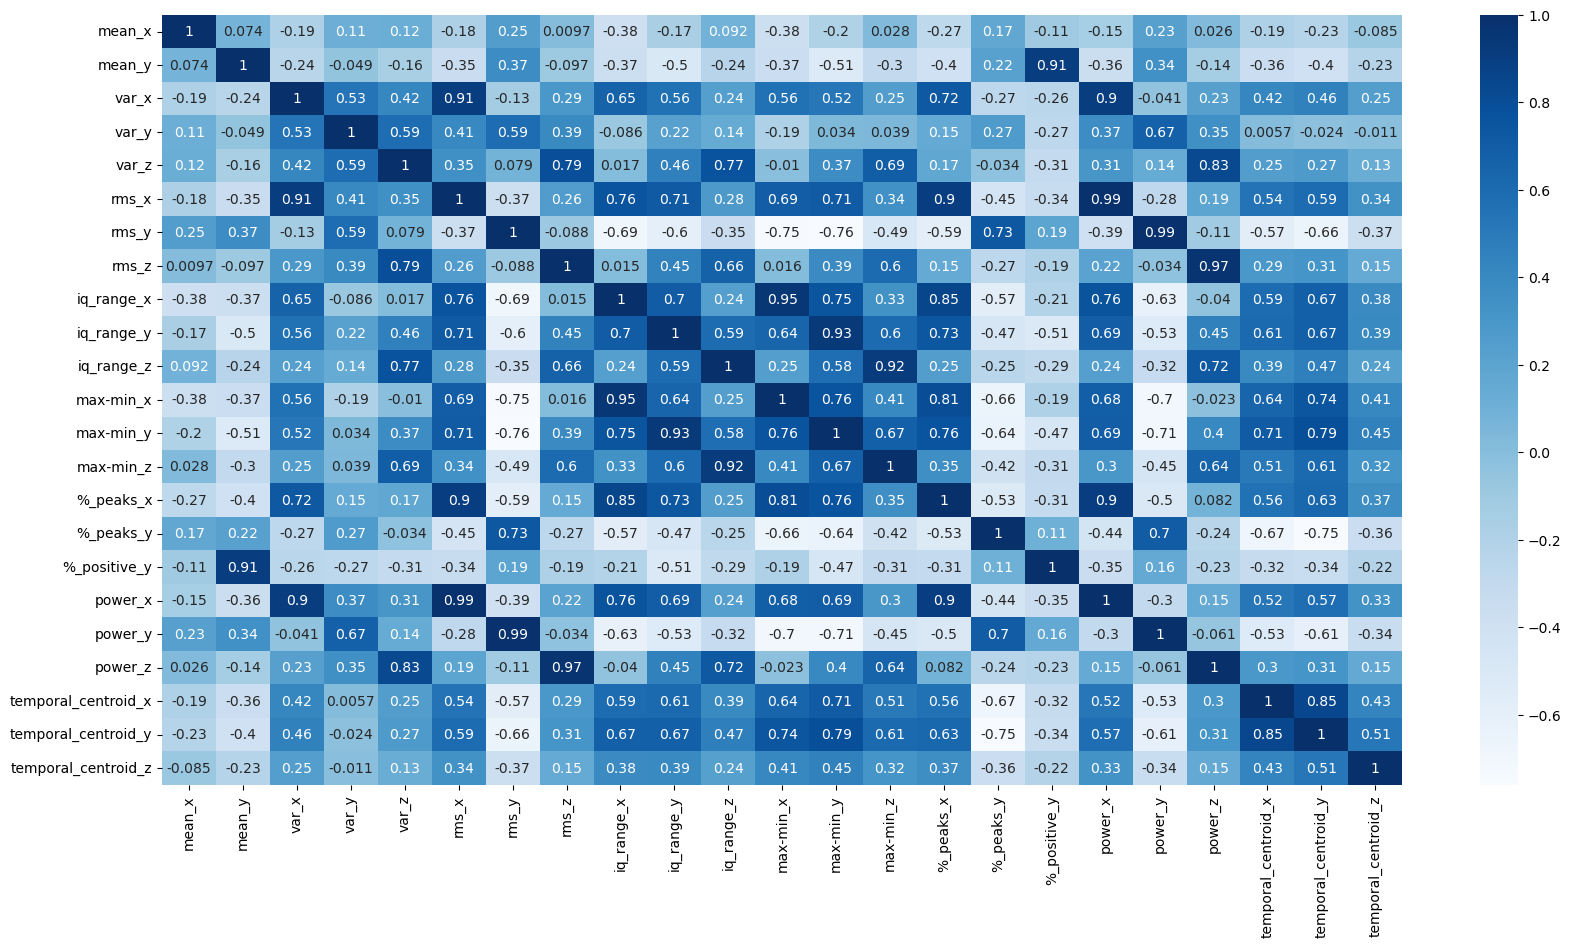

In [29]:
#we plot the heatmap to study the correlation

Corr_matrix=data.iloc[:,:-1].corr()
plt.figure(figsize = (20,10))
sns.heatmap(Corr_matrix, annot=True, cmap="Blues")

In [30]:
#we remove highly correlated features 

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.iloc[:,:-1].corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(data, 0.8)

print('correlated features: ', corr_features)

correlated features:  {'%_positive_y', '%_peaks_x', 'max-min_y', 'temporal_centroid_y', 'max-min_x', 'power_y', 'power_z', 'max-min_z', 'rms_x', 'power_x'}


#### Removing correlated features

In [31]:
data = data.drop(corr_features,axis=1)
data

data_test = data_test.drop(corr_features,axis=1)
data_test

,mean_x,mean_y,var_x,var_y,var_z,rms_y,rms_z,iq_range_x,iq_range_y,iq_range_z,%_peaks_y,temporal_centroid_x,temporal_centroid_z,class
0,0.132747,0.982278,0.027326,0.073672,0.010696,1.019077,0.198479,0.128198,0.047380,0.056230,0.265072,8.844922,8.551184,1
1,-0.372855,0.521259,0.336295,0.270049,0.049339,0.735968,0.337720,1.031175,0.543000,0.139275,0.085010,124.152339,119.280011,2
2,0.363944,0.570922,0.213954,0.264439,0.022998,0.768263,0.368751,0.951249,1.093910,0.077590,0.104972,103.722157,101.563117,3
3,-0.497597,0.554972,0.201305,0.178404,0.007796,0.697318,0.296079,0.937042,0.853010,0.081085,0.085366,86.665903,88.025058,3
4,-0.301640,0.658370,0.273759,0.110709,0.039540,0.737637,0.344550,1.051895,0.631860,0.296020,0.132576,90.375512,93.519988,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,-0.167665,0.309594,0.110166,0.551915,0.183935,0.804620,0.679109,0.438015,1.283470,0.511635,0.013933,114.287165,112.749991,2
137,0.055527,0.991768,0.060032,0.292320,0.013331,1.129489,0.124628,0.080960,0.027630,0.086146,0.269629,73.303328,73.772207,1
138,0.087471,0.764442,0.274612,0.154802,0.011772,0.859653,0.114861,0.842240,0.359370,0.114067,0.194046,57.769931,51.624032,3
139,0.077954,0.985058,0.089568,0.371630,0.027227,1.158364,0.252337,0.165200,0.094770,0.123350,0.379626,35.869305,35.670670,1


#### Final Features

<AxesSubplot:>

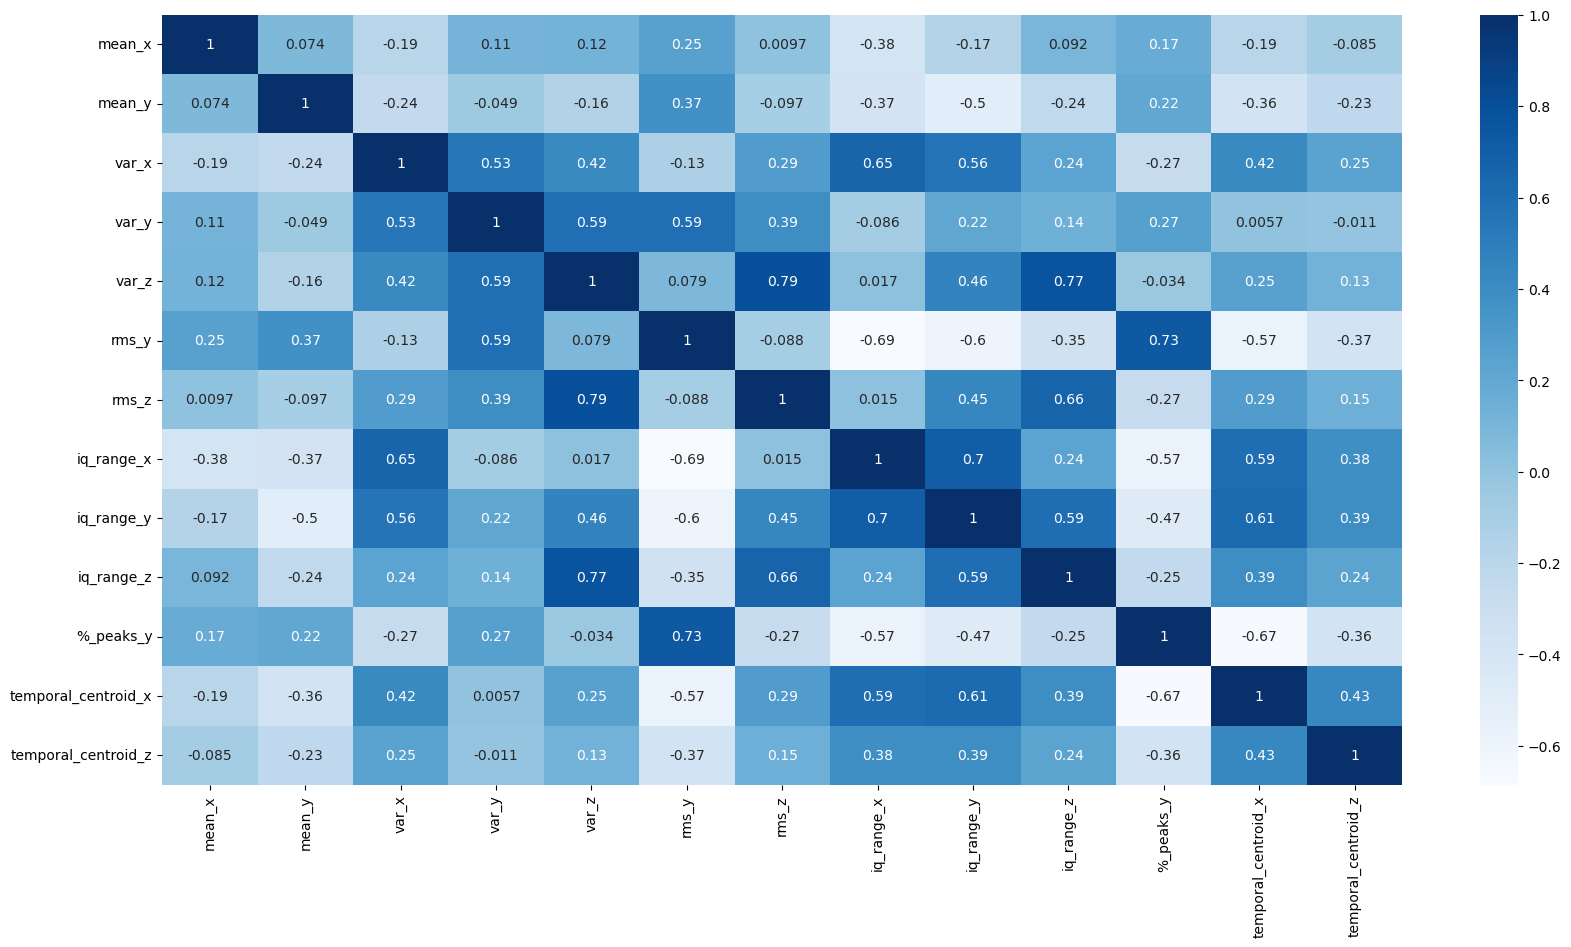

In [32]:
Corr_matrix=data.iloc[:,:-1].corr() #between all possible pairs of variable, df è il nostro dataframe
plt.figure(figsize = (20,10))
sns.heatmap(Corr_matrix, annot=True, cmap="Blues")

Below is the final list of features utilized for training the models. We also indicate the axes along which each feature was retained.

| List of Retained Features | Axes |
| --- | --- |
|Mean| x,y|
|Variance | x,y,z|
|RMS | y,z|
|Interquartile Range | x,y,z| 
|%Peaks Over Threshold | y|
|Temporal Centroid| x,z|


### **Classification**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
#We prepare the variables and labels to train and test the models

X_train=data.iloc[:,:-1]
y_train=data.iloc[:,-1].values

X_test=data_test.iloc[:,:-1]
y_test=data_test.iloc[:,-1].values

#### Normalization

Due to the varying scales of the data, we have chosen to normalize them using a Standard Scaler. This normalization technique ensures that the data is transformed to have zero mean and unit variance, allowing for better comparability and analysis.

In [35]:
scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Cross Validation applied to different models

For each model, we perform a GridSearch to identify the optimal set of parameters. The GridSearch is conducted using 10-fold cross-validation, which involves dividing the dataset into 10 equal parts and using 9 parts for training the model while validating its performance on the remaining part. This process is repeated 10 times, with each part serving as the validation set once. By systematically exploring different parameter combinations and evaluating performance using cross-validation, we aim to determine the best parameter configuration for each model. Please note that an exception was made for the Logistic Regression model, wherein we solely applied 10-fold cross-validation without conducting a GridSearch. This decision was made considering the specific characteristics and requirements of the Logistic Regression algorithm, which may not heavily rely on tuning hyperparameters through a GridSearch. Nonetheless, we ensured a thorough evaluation of the model's performance by utilizing 10-fold cross-validation.

In [36]:
from sklearn.model_selection import cross_validate, GridSearchCV

#### SVM

In [38]:
from sklearn import svm

svmc = svm.SVC(random_state=42)
param_grid = [{'kernel': ['linear'],'C': [1, 10, 100, 1000], 'gamma': [0.0]},
  {'kernel': ['rbf', 'poly', 'sigmoid'],'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], }, 
]

grid_search_svm = GridSearchCV(estimator=svmc, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train_scaled, y_train)
print('Best Model: ', grid_search_svm.best_params_)
print('Accuracy:', grid_search_svm.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


ValueError: The gamma value of 0.0 is invalid. Use 'auto' to set gamma to a value of 1 / n_features.

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 10, 15, 20]
    }  

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)
print('Best Model: ', grid_search_rf.best_params_)
print('Accuracy:', grid_search_rf.best_score_)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
reglog = LogisticRegression(multi_class='multinomial', random_state = 42)
scores = cross_validate(reglog, X_train_scaled, y_train, cv=10)

print('Accuracy:', scores['test_score'].mean())

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# perform grid search cv
knn = KNeighborsClassifier()
params = {'n_neighbors': list(range(1, 20)), 'p': [1, 2]}
grid_search_knn = GridSearchCV(knn, params, cv=10, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)
print('Best Model: ', grid_search_knn.best_params_)
print('Accuracy:', grid_search_knn.best_score_)

#### Select the best model 

In [ ]:
#The selection of the best model was based on various performance metrics, including accuracy, precision, F1 score, and recall. 
#After careful evaluation, it was determined that the Support Vector Machine (SVM) model slightly 
#outperformed the other models in terms of all these metrics.

win_svm = svm.SVC(C=grid_search_svm.best_params_['C'],
                  kernel=grid_search_svm.best_params_['kernel'],
                  gamma=grid_search_svm.best_params_['gamma'],
                  random_state=42)

win_rf = RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
                                max_depth=grid_search_rf.best_params_['max_depth'],
                                random_state=42)

win_knn = KNeighborsClassifier(n_neighbors=grid_search_knn.best_params_['n_neighbors'],p=grid_search_knn.best_params_['p'])

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_svm = cross_validate(win_svm, X_train_scaled, y_train, cv=10, scoring=scoring)
scores_rf = cross_validate(win_rf, X_train_scaled, y_train, cv=10, scoring=scoring)
scores_reglog = cross_validate(reglog, X_train_scaled, y_train, cv=10, scoring=scoring)
scores_knn = cross_validate(win_knn, X_train_scaled, y_train, cv=10, scoring=scoring)

# Create a dataframe with first column with names of models and second column with mean accuracy scores
scores = pd.DataFrame({'model': ['svm', 'rf', 'reglog', 'knn'],
                       'accuracy': [scores_svm['test_accuracy'].mean(),
                                    scores_rf['test_accuracy'].mean(),
                                    scores_reglog['test_accuracy'].mean(),
                                    scores_knn['test_accuracy'].mean()],

                       'precision': [scores_svm['test_precision_macro'].mean(),
                                     scores_rf['test_precision_macro'].mean(),
                                     scores_reglog['test_precision_macro'].mean(),
                                     scores_knn['test_precision_macro'].mean()],

                       'recall': [scores_svm['test_recall_macro'].mean(),
                                  scores_rf['test_recall_macro'].mean(),
                                  scores_reglog['test_recall_macro'].mean(),
                                  scores_knn['test_recall_macro'].mean()],

                       'f1': [scores_svm['test_f1_macro'].mean(),
                              scores_rf['test_f1_macro'].mean(),
                              scores_reglog['test_f1_macro'].mean(),
                              scores_knn['test_f1_macro'].mean()]
                        })

# Print the dataframe
scores

SELECTED MODEL: SVM {'C': 10, 'gamma': 0, 'kernel': 'linear'}

In [ ]:
#RUNNIAMO IL TEST SU TUTTI

win_svm.fit(X_train_scaled, y_train)
y_pred_svm = win_svm.predict(X_test_scaled)

win_rf.fit(X_train_scaled, y_train)
y_pred_rf = win_rf.predict(X_test_scaled)

reglog.fit(X_train_scaled, y_train)
y_pred_reglog = reglog.predict(X_test_scaled)

win_knn.fit(X_train_scaled, y_train)
y_pred_knn = win_knn.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create a dataframe with first column with names of models and second column with mean accuracy scores
scores = pd.DataFrame({'model': ['svm', 'rf', 'reglog', 'knn'],
                        'accuracy': [accuracy_score(y_test, y_pred_svm),
                                        accuracy_score(y_test, y_pred_rf),
                                        accuracy_score(y_test, y_pred_reglog),
                                        accuracy_score(y_test, y_pred_knn)],
                        'precision': [precision_score(y_test, y_pred_svm, average='macro'),
                                        precision_score(y_test, y_pred_rf, average='macro'),
                                        precision_score(y_test, y_pred_reglog, average='macro'),
                                        precision_score(y_test, y_pred_knn, average='macro')],
                        'recall': [recall_score(y_test, y_pred_svm, average='macro'),
                                    recall_score(y_test, y_pred_rf, average='macro'),
                                    recall_score(y_test, y_pred_reglog, average='macro'),
                                    recall_score(y_test, y_pred_knn, average='macro')],
                        'f1': [f1_score(y_test, y_pred_svm, average='macro'),
                                f1_score(y_test, y_pred_rf, average='macro'),
                                f1_score(y_test, y_pred_reglog, average='macro'),
                                f1_score(y_test, y_pred_knn, average='macro')]
                        })

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Create confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create confusion matrix for Logistic Regression
cm_reglog = confusion_matrix(y_test, y_pred_reglog)

# Create confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# print the confusion matrices with a title
print('Confusion matrix for SVM')
print(cm_svm)
print('Confusion matrix for Random Forest')
print(cm_rf)
print('Confusion matrix for Logistic Regression')
print(cm_reglog)
print('Confusion matrix for KNN')
print(cm_knn)

#### Best model 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

win_svm.fit(X_train_scaled, y_train)
y_pred = win_svm.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_svm.classes_)
disp.plot(cmap='Blues')

#### Addendum - 10 Classes

We have made the decision to utilize our selected model to conduct classification with 10 classes. The preliminary results obtained from this classification task appear to be promising

In [ ]:
#try our models on the 10 classes dataset

X10_train=data.iloc[:,:-1]
y10_train=d_classes['class10'].values

X10_test=data_test.iloc[:,:-1]
y10_test=d_classes_test['class10'].values

scaler=StandardScaler()

X10_train_scaled = scaler.fit_transform(X10_train)
X10_test_scaled = scaler.transform(X10_test)

win_svm.fit(X10_train_scaled, y10_train)
y10_pred = win_svm.predict(X10_test_scaled)

cm = confusion_matrix(y10_test, y10_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_svm.classes_)
disp.plot(cmap='Blues')

win_rf.fit(X10_train_scaled, y10_train)
y10_pred = win_rf.predict(X10_test_scaled)

cm = confusion_matrix(y10_test, y10_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_rf.classes_)
disp.plot(cmap='Blues')

win_knn.fit(X10_train_scaled, y10_train)
y10_pred = win_knn.predict(X10_test_scaled)

cm = confusion_matrix(y10_test, y10_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=win_knn.classes_)
disp.plot(cmap='Blues')

reglog.fit(X10_train_scaled, y10_train)
y10_pred = reglog.predict(X10_test_scaled)

cm = confusion_matrix(y10_test, y10_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=reglog.classes_)
disp.plot(cmap='Blues')


In [ ]:
#we plot the matrix

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_10svm = cross_validate(win_svm, X10_train_scaled, y10_train, cv=10, scoring=scoring)
scores_10rf = cross_validate(win_rf, X10_train_scaled, y10_train, cv=10, scoring=scoring)
scores_10reglog = cross_validate(reglog, X10_train_scaled, y10_train, cv=10, scoring=scoring)
scores_10knn = cross_validate(win_knn, X10_train_scaled, y10_train, cv=10, scoring=scoring)

# Create a dataframe with first column with names of models and second column with mean accuracy scores
scores10 = pd.DataFrame({'model': ['svm', 'rf', 'reglog', 'knn'],
                       'accuracy': [scores_10svm['test_accuracy'].mean(),
                                    scores_10rf['test_accuracy'].mean(),
                                    scores_10reglog['test_accuracy'].mean(),
                                    scores_10knn['test_accuracy'].mean()],

                       'precision': [scores_10svm['test_precision_macro'].mean(),
                                     scores_10rf['test_precision_macro'].mean(),
                                     scores_10reglog['test_precision_macro'].mean(),
                                     scores_10knn['test_precision_macro'].mean()],

                       'recall': [scores_10svm['test_recall_macro'].mean(),
                                  scores_10rf['test_recall_macro'].mean(),
                                  scores_10reglog['test_recall_macro'].mean(),
                                  scores_10knn['test_recall_macro'].mean()],

                       'f1': [scores_10svm['test_f1_macro'].mean(),
                              scores_10rf['test_f1_macro'].mean(),
                              scores_10reglog['test_f1_macro'].mean(),
                              scores_10knn['test_f1_macro'].mean()]
                        })

# Print the dataframe
scores10